1. The process of downloading major stock indices data provided by Yahoo Finance and processing as Dataframe
    - Continue from "01_04 yahoo_finance stock_indices download multi ticker.ipynb"
    - Download multi historical price data from yahoo finance
        - Input : Historical price DataFrame
        - Output: Indices line chart(all for one chart and individual index chart)

In [1]:
# Loading Python Packages to use 
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns                

# use the code from "01_03 yahoo_finance stock_indices download multi ticker.ipynb"

major_indices = pd.DataFrame(pd.read_html("https://finance.yahoo.com/world-indices")[0])

# Slicing columns
i = 5                                       # set column counter variable, change i to slicing columns
major_indices1 = major_indices.iloc[:, :i]  # create another dataframe 'major_indices1'
major_indices1
drop_row_index_list = [3,4,5,7,11,12,13,14,20,25,28,31,32,33,34,35]  

major_indices2 = major_indices.drop(drop_row_index_list,axis=0)       
major_indices1_2 = major_indices1.drop(drop_row_index_list,axis=0) #Datafrmae to use 

Tks=major_indices1_2['Symbol'].values.tolist()

# Declare historical price variables[symbols('ticker'), date, interval, etc]
# yf.download(ticker, start, end, interval, etc) input varibales:'ticker', 'start=', 'end=', 'interval=' etc
tk = Tks                 # Use ticker list 'Tks' of 'Symbol' from DataFrame 'major_indices1_2' 

s_d = '2007-12-20'          # start date
e_d = '2022-12-31'          # end date, if it is up to today, just drop 'end' parameter
periods = 'ytd'             # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
interval='1d'               # Valid interval : Daily;'1D', Weekly:'1wk',monthly:'1mo', 3month :'3mo'                        
# Download from start date to end date
df = pd.DataFrame(yf.download(tk,start=s_d,end=e_d,interval=interval)['Adj Close'])

col_list=df.columns.to_list()       

df_name=pd.DataFrame(col_list)
df_name.columns=['Symbol']
df_name1=pd.merge(df_name, major_indices, how='left')
df_name1=df_name1['Name'].to_list()
df.columns=df_name1

df1=df.reset_index()            # date필드 설정을 위해서 인덱스를 해제

# Get all dates within the sample period (데이터에 없는 날짜 채우기)
start_date = df1['Date'].astype(str).iloc[0] 
end_date = df1['Date'].astype(str).iloc[-1]  
   
date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True) 

# Merge two dataframes and fill NaN value with previous value
df1_all = pd.merge(date_all,df1,how='left')    
df1_all = df1_all.fillna(method='ffill')
df1_all = df1_all.set_index('Date',drop=True)

[*********************100%***********************]  20 of 20 completed


In [2]:
df1_all


,SSE Composite Index,Shenzhen Index,ALL ORDINARIES,S&P BSE SENSEX,IBOVESPA,Dow 30,CAC 40,FTSE 100,DAX PERFORMANCE-INDEX,S&P 500,HANG SENG INDEX,Nasdaq,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,KOSPI Composite Index,IPC MEXICO,Nikkei 225,Russell 2000,STI Index,TSEC weighted index
Date,,,,,,,,,,,,,,,,,,,,
2007-12-19,4941.784180,16386.826172,NaN,19091.960938,61722.0,13207.269531,5497.419922,6284.500000,7837.319824,1453.000000,27029.259766,2601.010010,2657.977051,1387.209961,NaN,29074.119141,NaN,756.130005,3357.340088,8014.279297
2007-12-20,5043.535156,16625.224609,6244.799805,19162.570312,61716.0,13245.639648,5511.450195,6345.600098,7869.189941,1460.119995,27017.089844,2640.860107,2657.977051,1387.209961,1844.369995,29148.449219,15031.599609,767.539978,3357.340088,7857.050293
2007-12-21,5101.778809,16808.490234,6309.399902,19162.570312,63098.0,13450.650391,5602.770020,6434.100098,8002.669922,1484.459961,27626.919922,2691.989990,2657.977051,1403.560059,1878.319946,29638.400391,15257.000000,785.599976,3398.100098,7941.409668
2007-12-22,5101.778809,16808.490234,6309.399902,19162.570312,63098.0,13450.650391,5602.770020,6434.100098,8002.669922,1484.459961,27626.919922,2691.989990,2657.977051,1403.560059,1878.319946,29638.400391,15257.000000,785.599976,3398.100098,7941.409668
2007-12-23,5101.778809,16808.490234,6309.399902,19162.570312,63098.0,13450.650391,5602.770020,6434.100098,8002.669922,1484.459961,27626.919922,2691.989990,2657.977051,1403.560059,1878.319946,29638.400391,15257.000000,785.599976,3398.100098,7941.409668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,3065.562988,10978.990234,7287.799805,60566.421875,108738.0,33203.929688,6504.899902,7473.000000,13940.929688,3844.820068,19593.060547,10497.860352,6835.808105,1474.680054,2317.139893,50273.890625,26405.869141,1760.930054,3257.699951,14285.129883
2022-12-27,3095.570068,11106.500000,7287.799805,60927.429688,108347.0,33241.558594,6550.660156,7473.000000,13995.099609,3829.250000,19593.060547,10353.230469,6923.026855,1474.689941,2332.790039,50440.019531,26447.869141,1749.520020,3266.379883,14328.429688
2022-12-28,3087.399902,11010.530273,7262.200195,60910.281250,110237.0,32875.710938,6510.490234,7497.200195,13925.599609,3783.219971,19898.910156,10213.290039,6850.520020,1480.109985,2280.449951,49648.210938,26340.500000,1722.020020,3266.969971,14173.099609


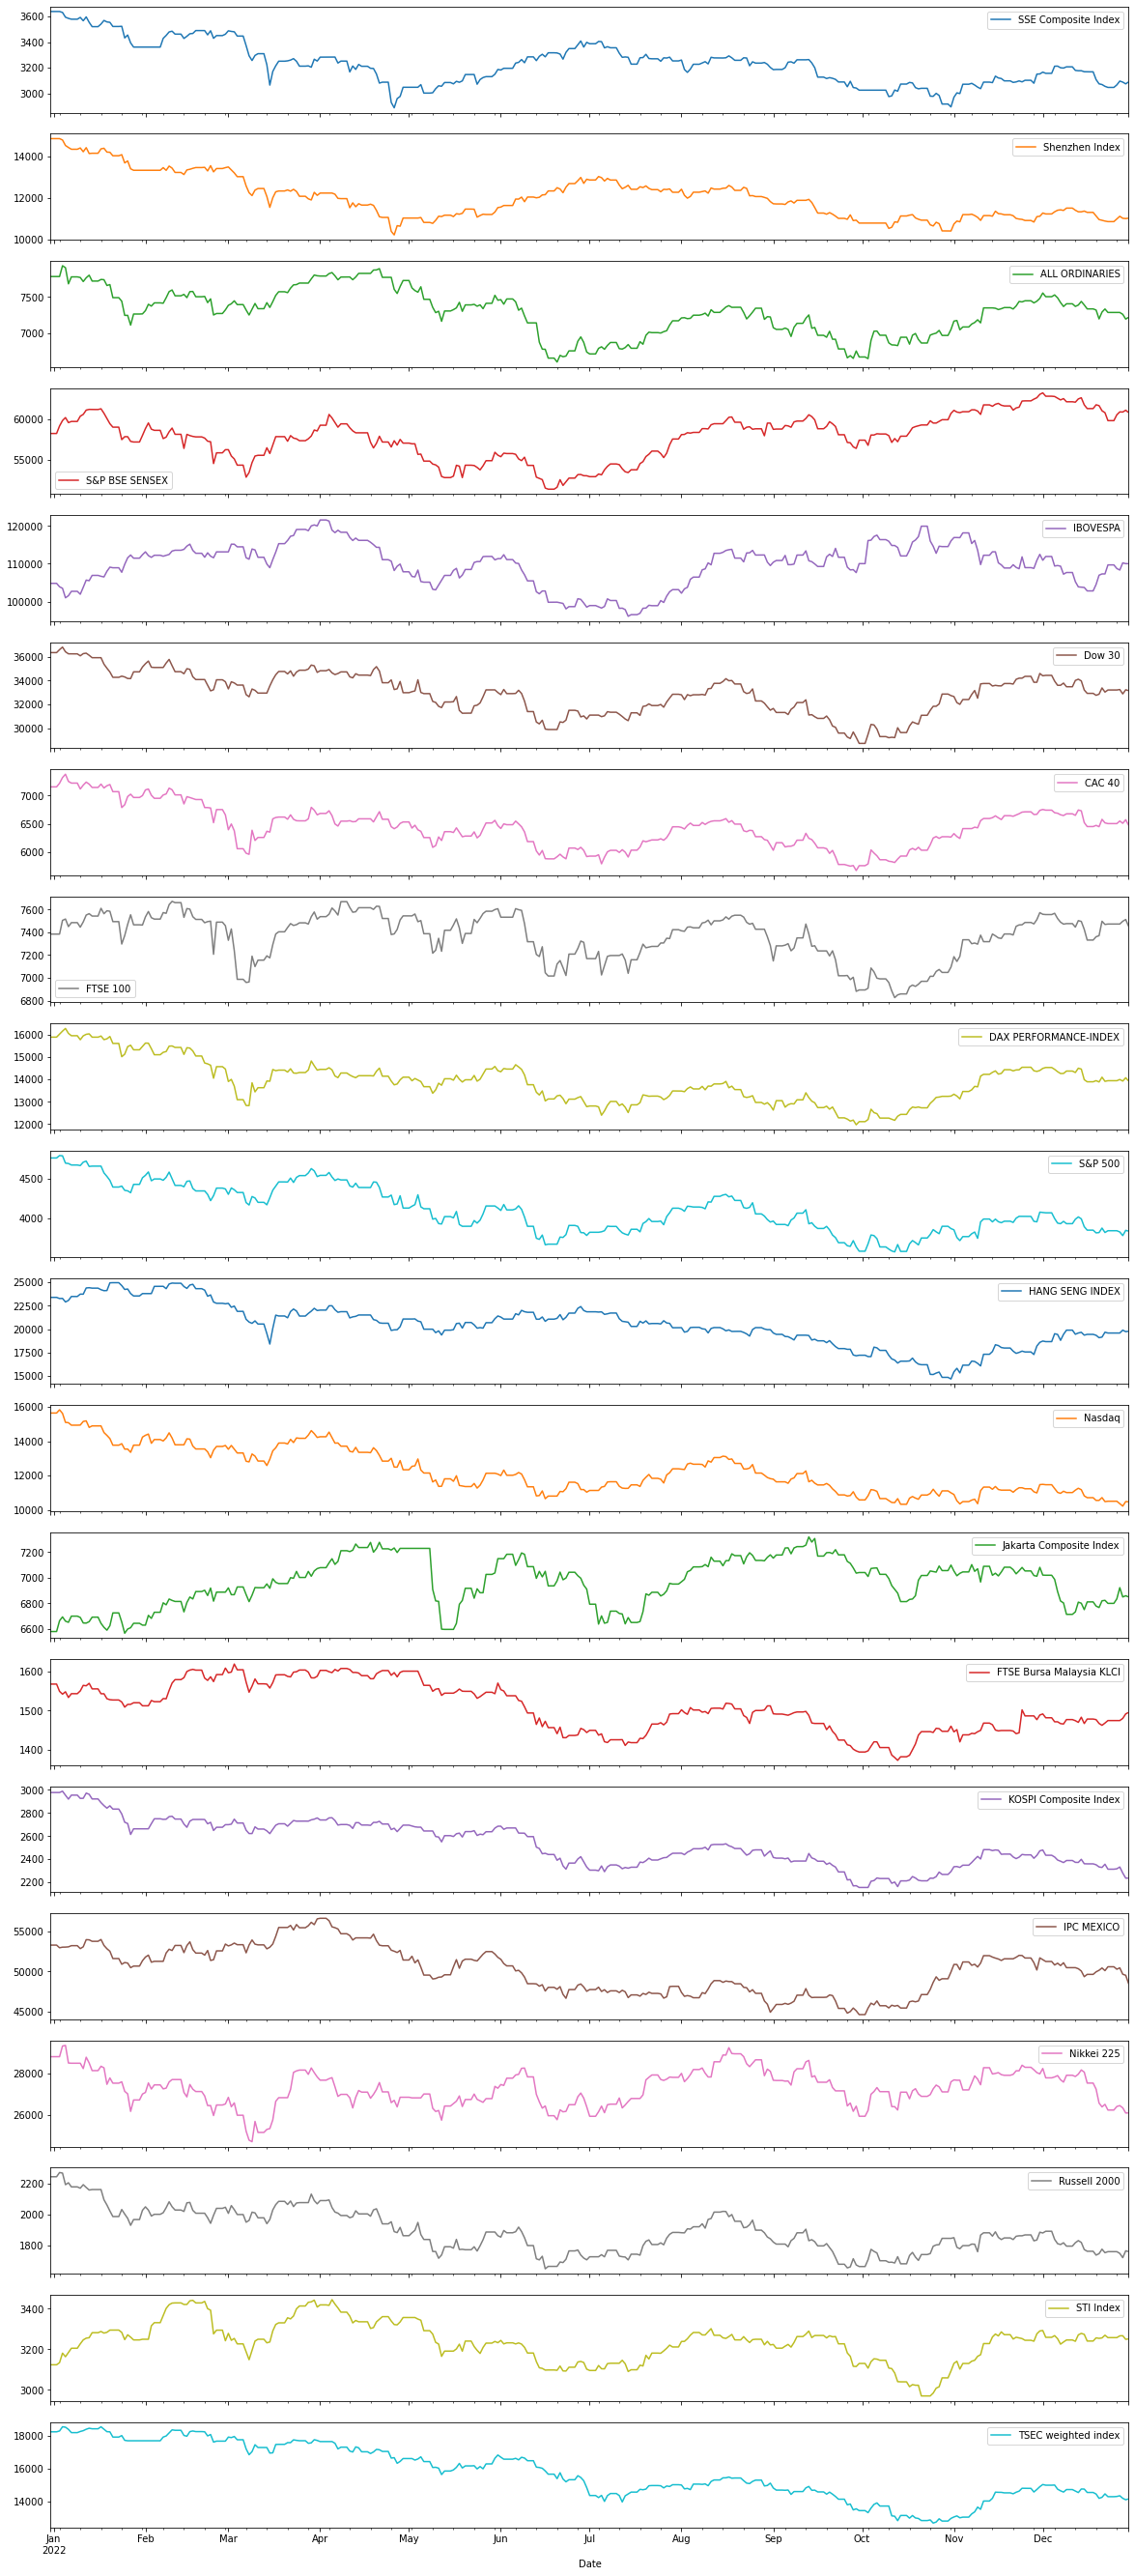

In [3]:
# 1-year line chart for all indices

df1year=df1_all.iloc[-365:,:].plot(kind='line', figsize=(20,48),subplots=True);
    

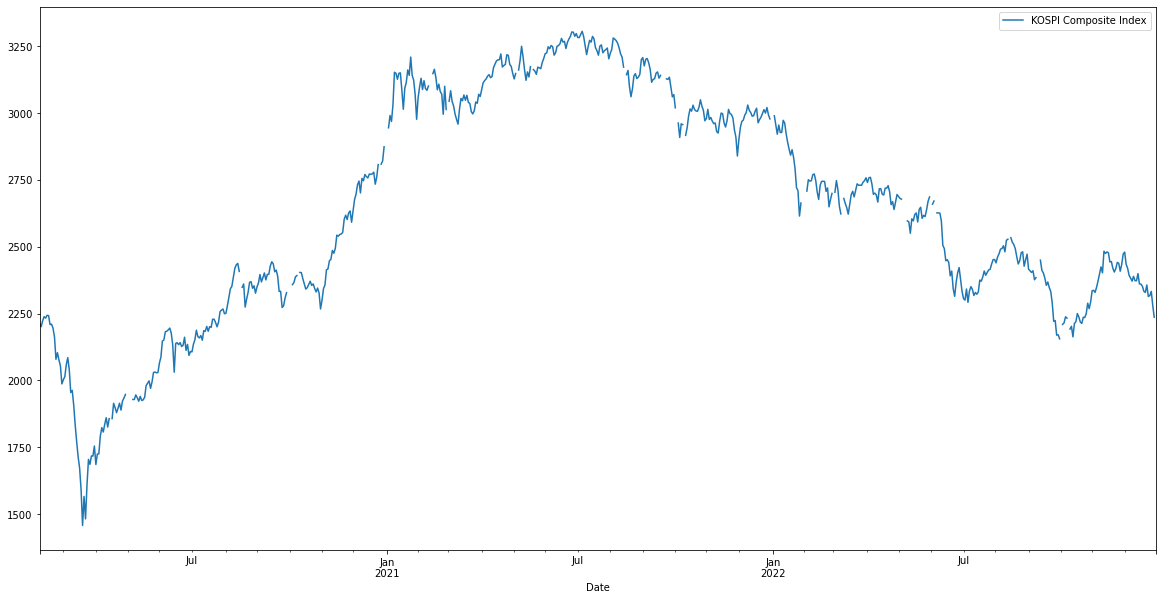

In [4]:
# one index line chart[change column index number, change no_days for period]

col_no = 14 # refer the df_name index

no_days = -252 * 3 # Appx. 252 days for 1 year

df.iloc[no_days:,col_no].plot(kind='line', figsize=(20,10),legend=True);

In [5]:

# 조회 기간 설정 start date, end date 변경을 통해서 챠트의 기간을 정할 수 있음, 조회기간을 변경하고 나면 다시 df_in 을 설정해 주어야 함
start = '2019-01-01'
end = '2019-12-31'

df_in_period=df1_all.loc[start:end,:]
df_in_period
columns_list=df_in_period.columns.to_list()        # df_in 의 컬럼을 리스트로 만든다



In [6]:
df_in_period

,SSE Composite Index,Shenzhen Index,ALL ORDINARIES,S&P BSE SENSEX,IBOVESPA,Dow 30,CAC 40,FTSE 100,DAX PERFORMANCE-INDEX,S&P 500,HANG SENG INDEX,Nasdaq,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,KOSPI Composite Index,IPC MEXICO,Nikkei 225,Russell 2000,STI Index,TSEC weighted index
Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,2493.895996,7239.790039,5709.399902,36068.328125,87887.0,23327.460938,4730.689941,6728.100098,10558.959961,2506.850098,25845.699219,6635.279785,6194.498047,1690.579956,2041.040039,41640.269531,20014.769531,1348.560059,3068.760010,9727.410156
2019-01-02,2465.291016,7149.270020,5625.600098,35891.519531,91012.0,23346.240234,4689.390137,6734.200195,10580.190430,2510.030029,25130.349609,6665.939941,6181.174805,1668.109985,2010.000000,42271.140625,20014.769531,1355.910034,3038.889893,9554.139648
2019-01-03,2464.363037,7089.439941,5694.600098,35513.710938,91564.0,22686.220703,4611.490234,6692.700195,10416.660156,2447.889893,25064.359375,6463.500000,6221.009766,1675.829956,1993.699951,42044.320312,20014.769531,1330.829956,3012.879883,9492.419922
2019-01-04,2514.867920,7284.839844,5677.000000,35695.101562,91841.0,23433.160156,4737.120117,6837.399902,10767.690430,2531.939941,25626.029297,6738.859863,6274.540039,1669.780029,2010.250000,42455.128906,19561.960938,1380.750000,3059.229980,9382.509766
2019-01-05,2514.867920,7284.839844,5677.000000,35695.101562,91841.0,23433.160156,4737.120117,6837.399902,10767.690430,2531.939941,25626.029297,6738.859863,6274.540039,1669.780029,2010.250000,42455.128906,19561.960938,1380.750000,3059.229980,9382.509766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3005.035889,10233.769531,6936.299805,41575.140625,116534.0,28645.259766,6037.390137,7644.899902,13337.110352,3240.020020,28225.419922,9006.620117,6329.313965,1610.609985,2204.209961,44261.511719,23837.720703,1669.030029,3226.530029,12091.589844
2019-12-28,3005.035889,10233.769531,6936.299805,41575.140625,116534.0,28645.259766,6037.390137,7644.899902,13337.110352,3240.020020,28225.419922,9006.620117,6329.313965,1610.609985,2204.209961,44261.511719,23837.720703,1669.030029,3226.530029,12091.589844
2019-12-29,3005.035889,10233.769531,6936.299805,41575.140625,116534.0,28645.259766,6037.390137,7644.899902,13337.110352,3240.020020,28225.419922,9006.620117,6329.313965,1610.609985,2204.209961,44261.511719,23837.720703,1669.030029,3226.530029,12091.589844


1 Daily Charts of SSE Composite Index


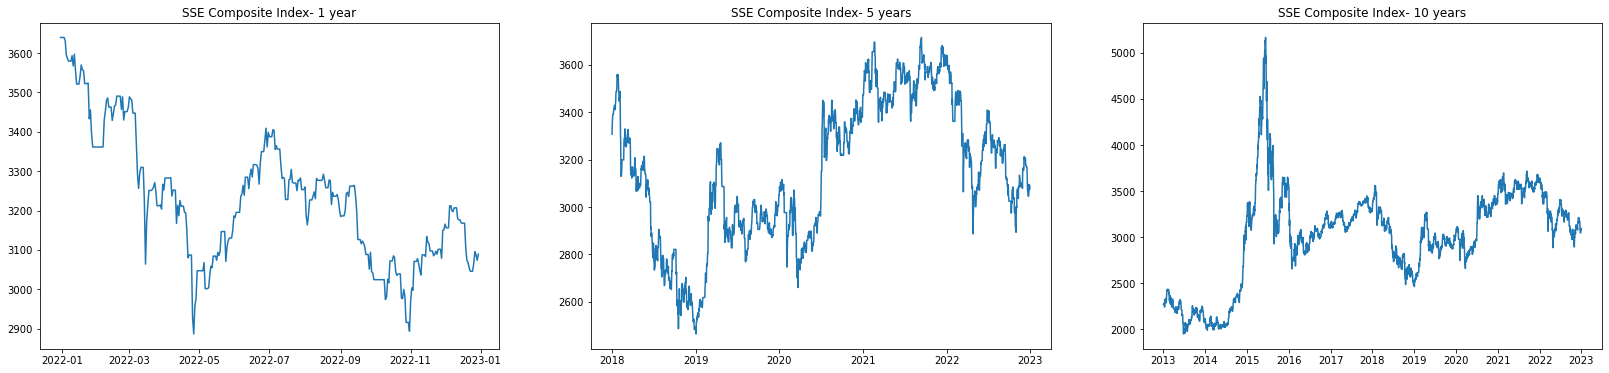

2 Daily Charts of Shenzhen Index


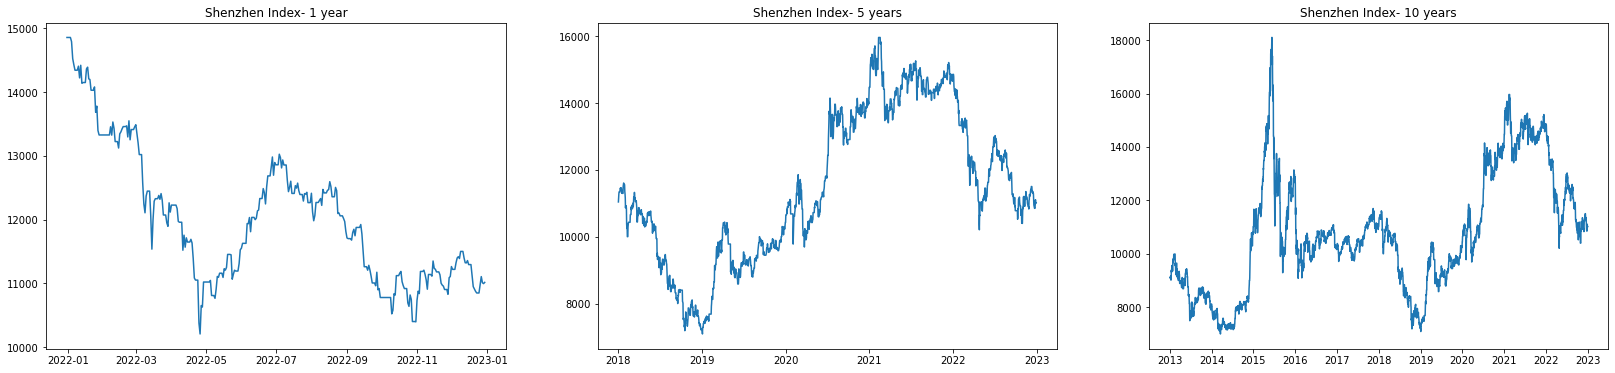

3 Daily Charts of ALL ORDINARIES


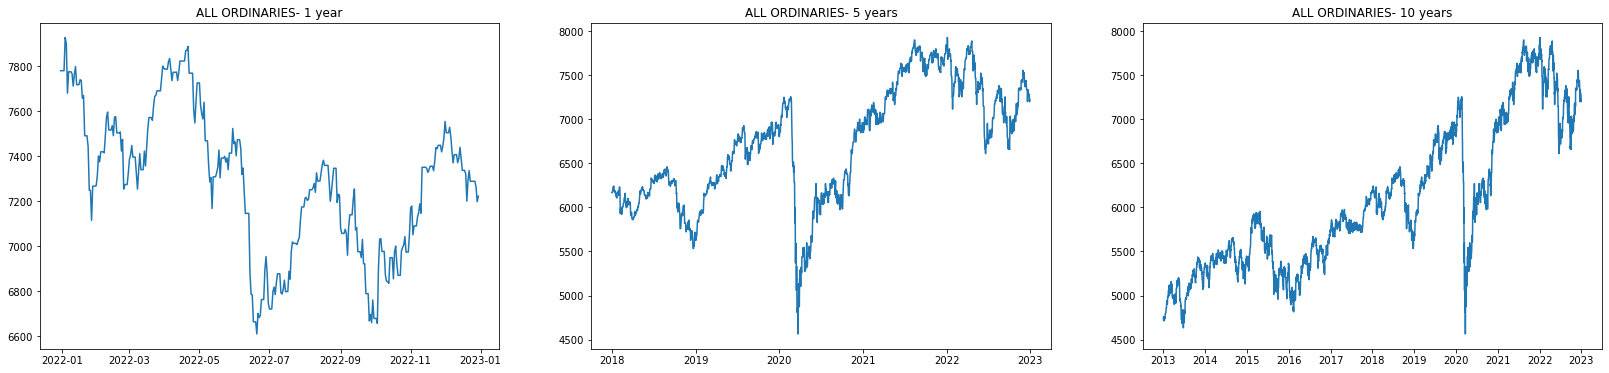

4 Daily Charts of S&P BSE SENSEX


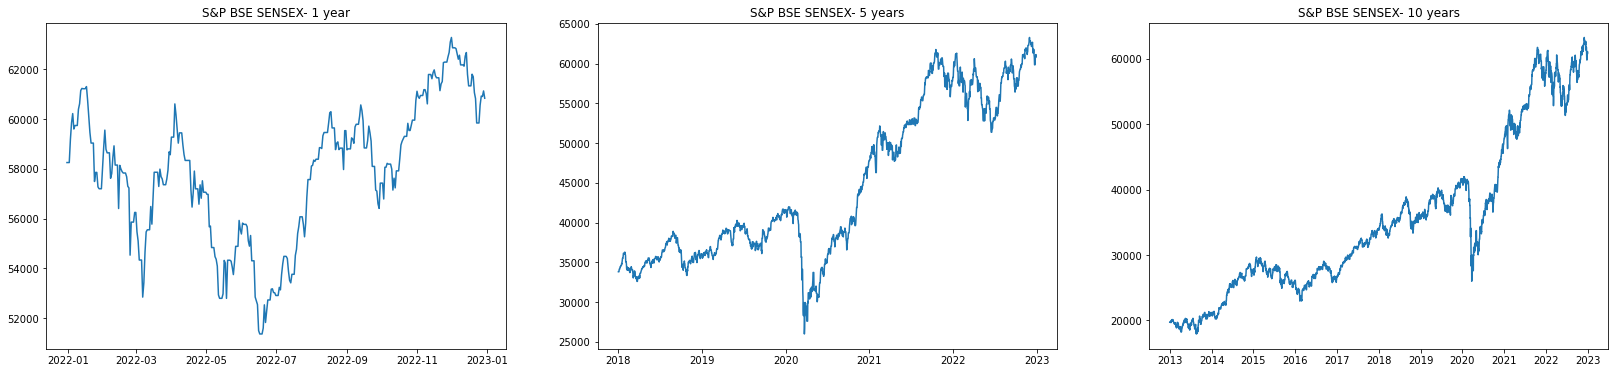

5 Daily Charts of IBOVESPA


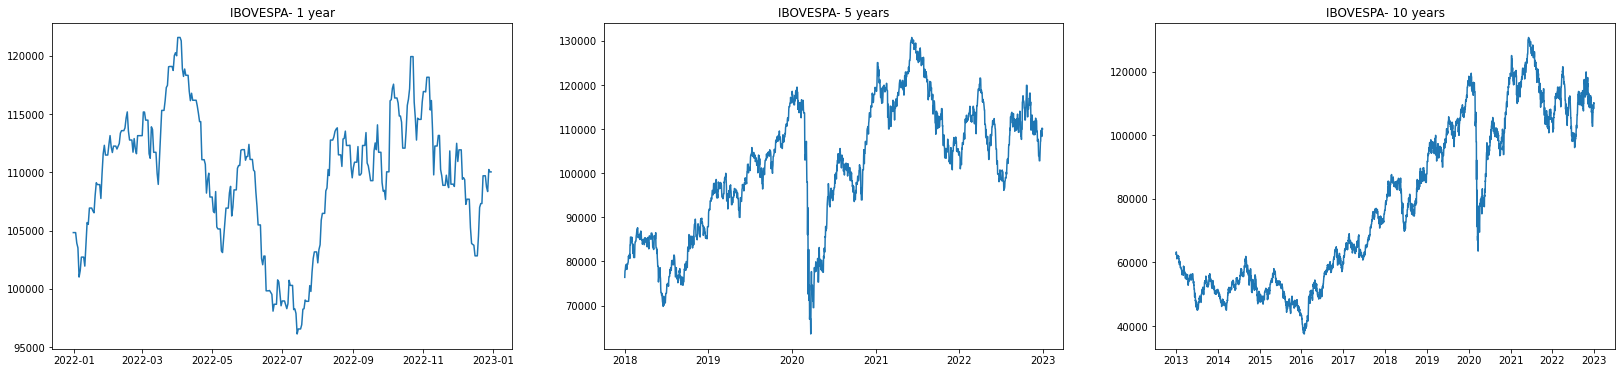

6 Daily Charts of Dow 30


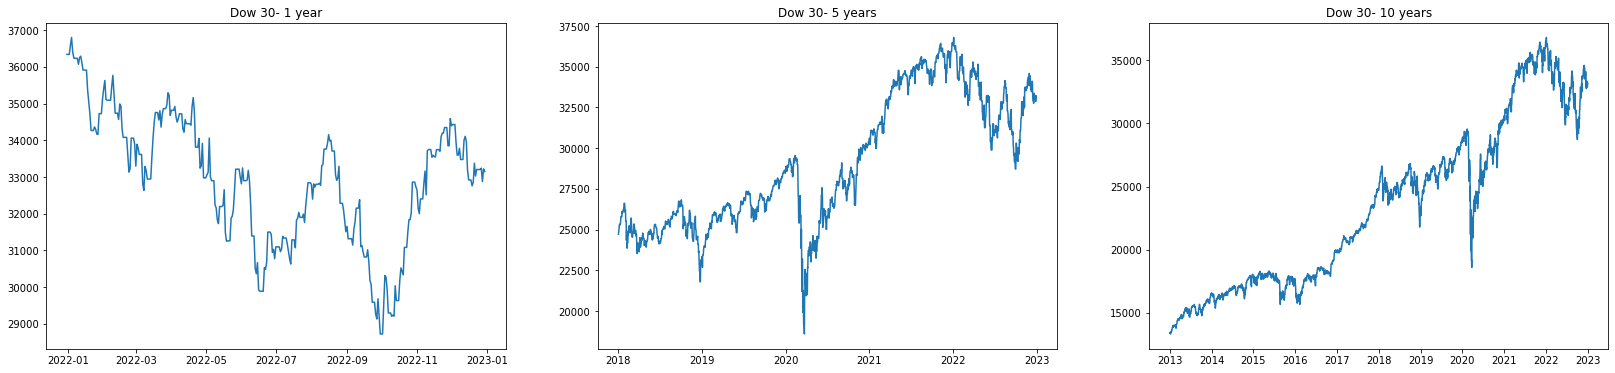

7 Daily Charts of CAC 40


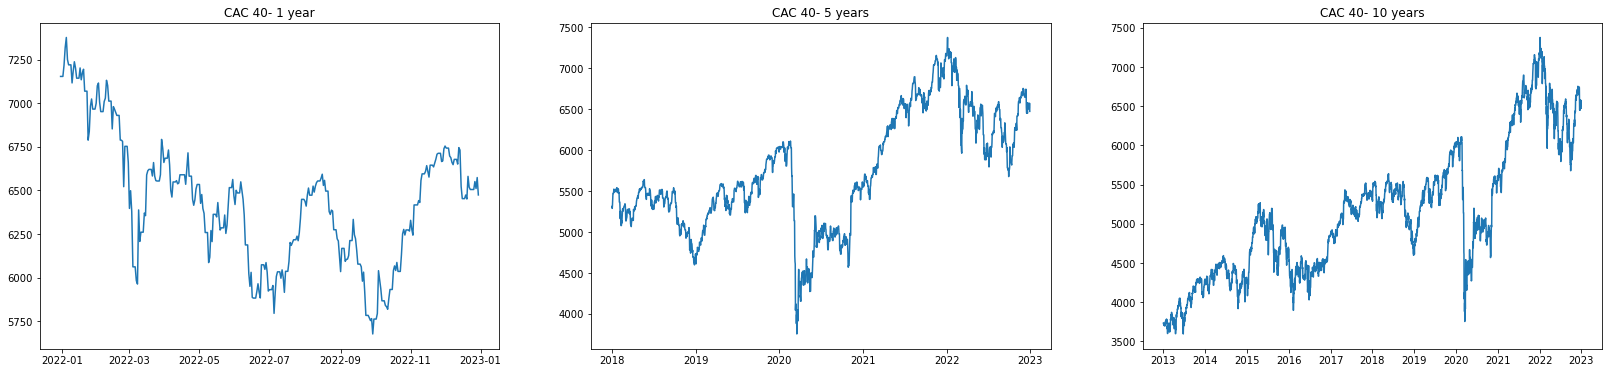

8 Daily Charts of FTSE 100


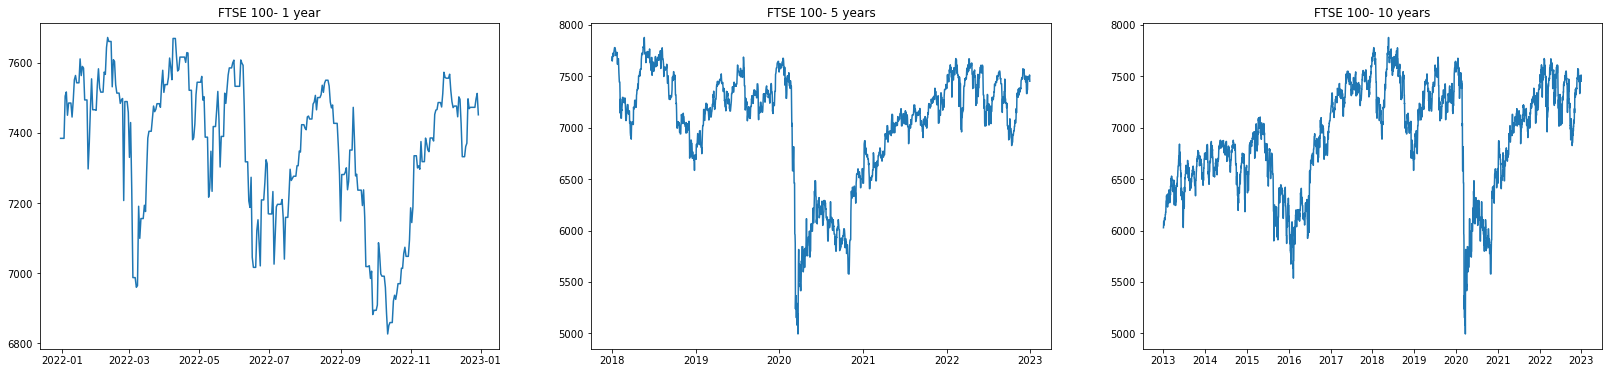

9 Daily Charts of DAX PERFORMANCE-INDEX


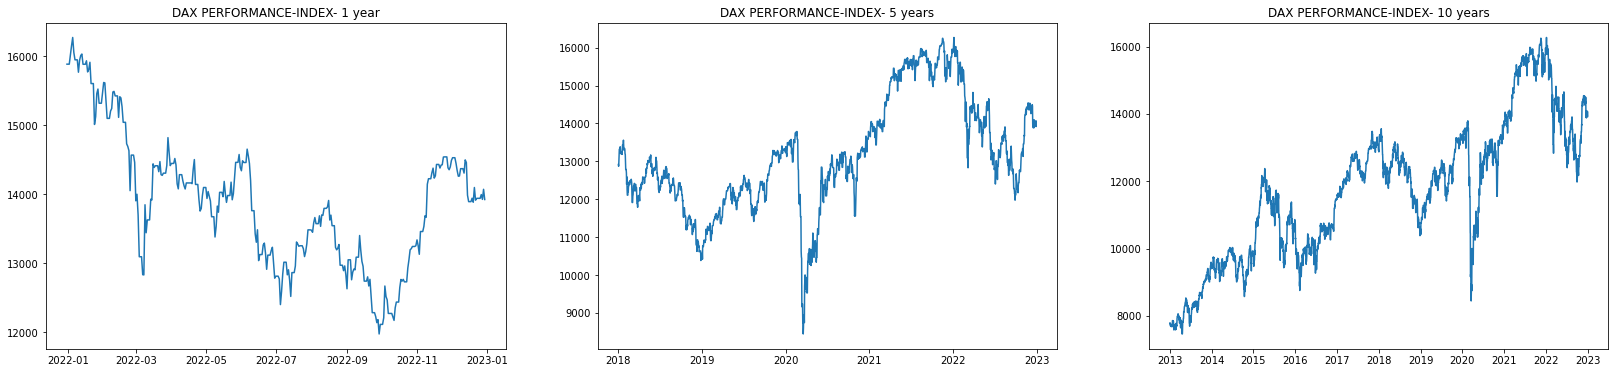

10 Daily Charts of S&P 500


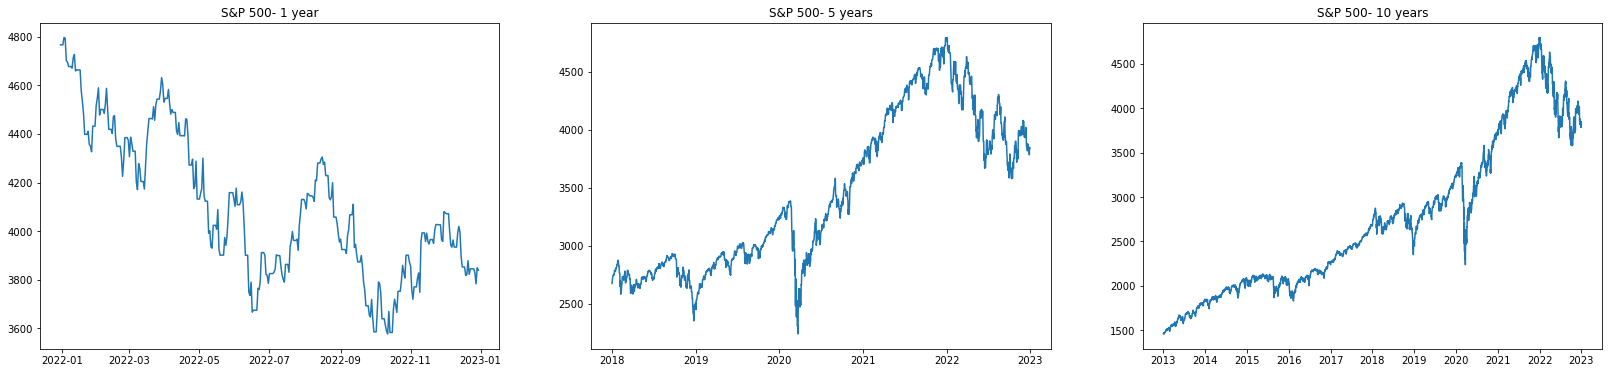

11 Daily Charts of HANG SENG INDEX


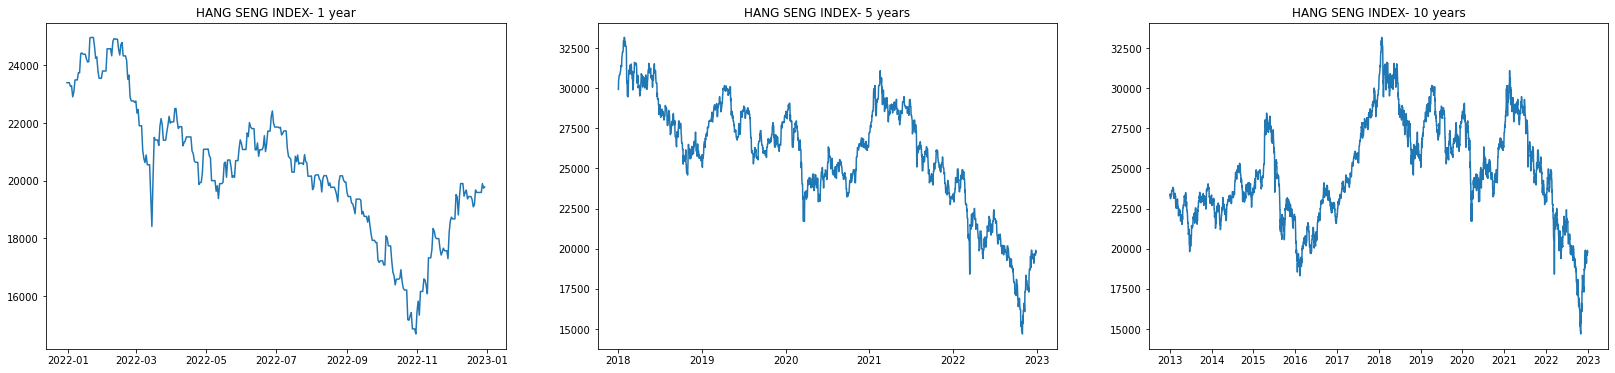

12 Daily Charts of Nasdaq


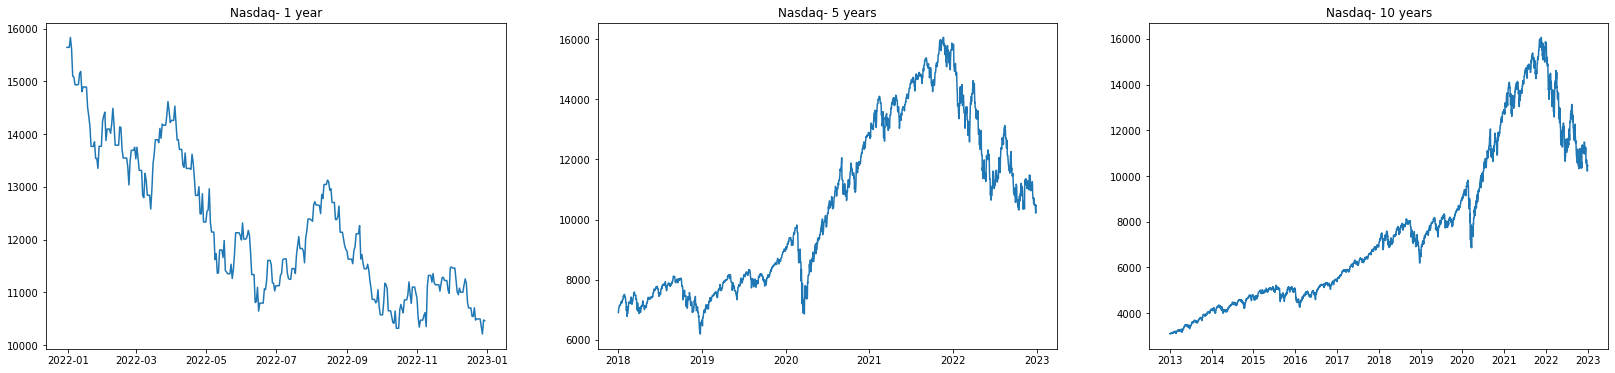

13 Daily Charts of Jakarta Composite Index


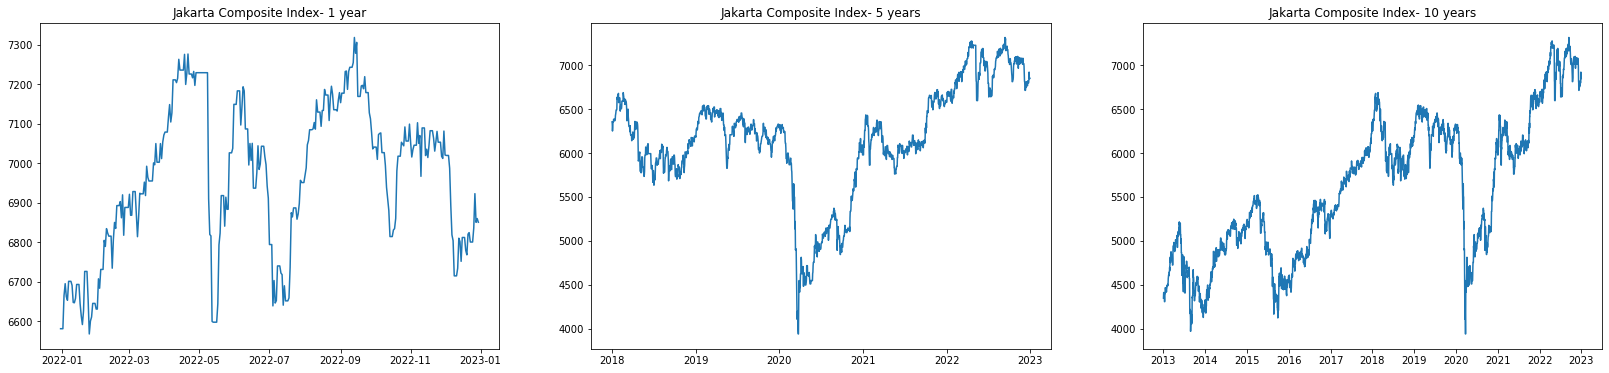

14 Daily Charts of FTSE Bursa Malaysia KLCI


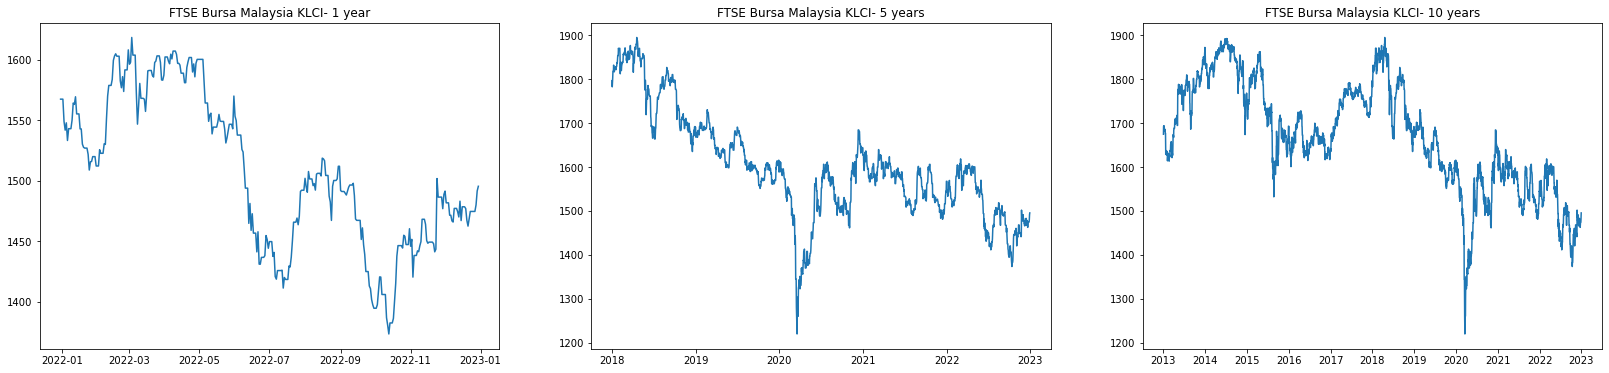

15 Daily Charts of KOSPI Composite Index


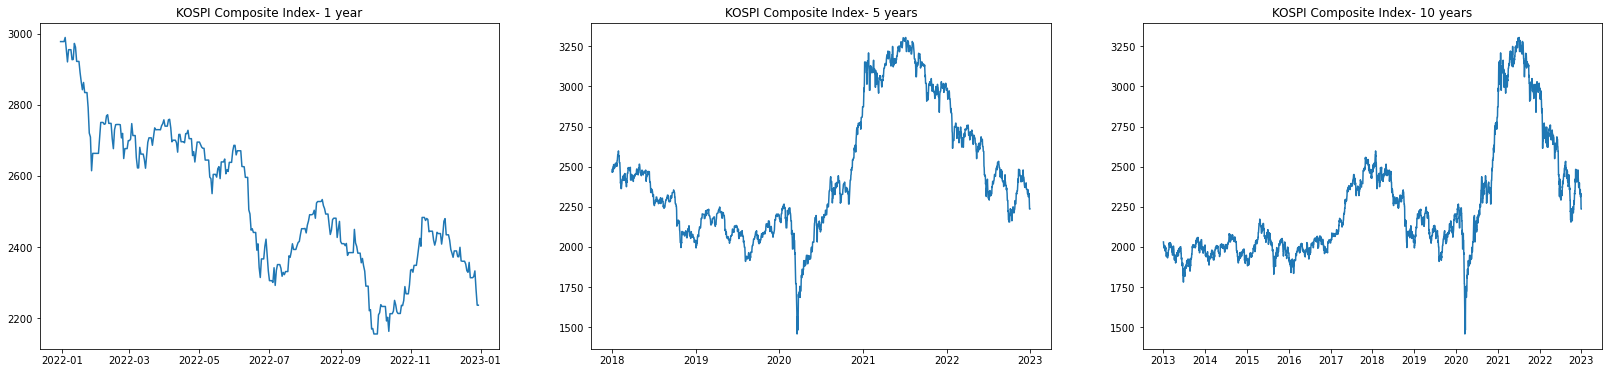

16 Daily Charts of IPC MEXICO


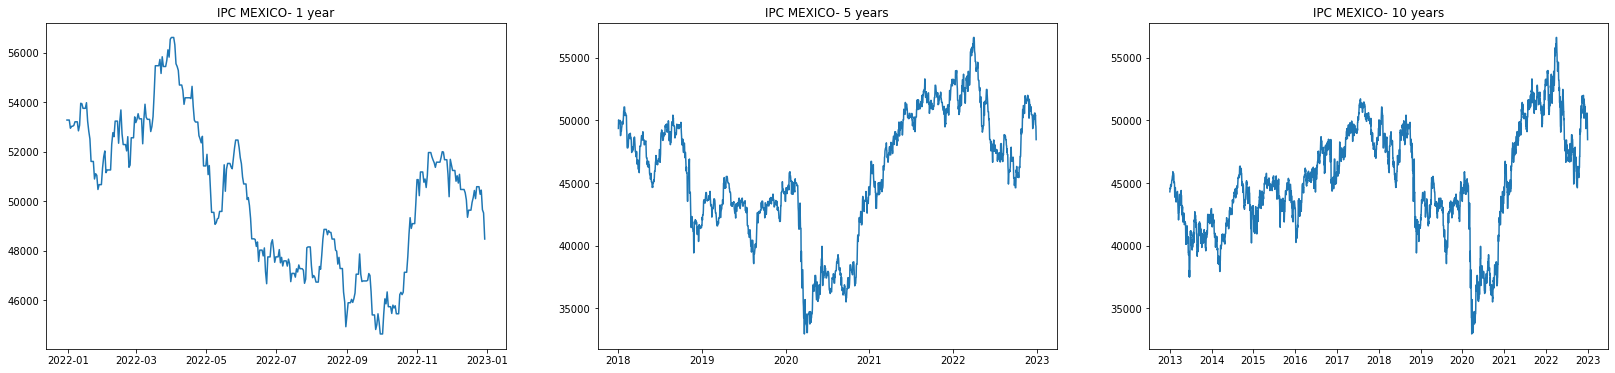

17 Daily Charts of Nikkei 225


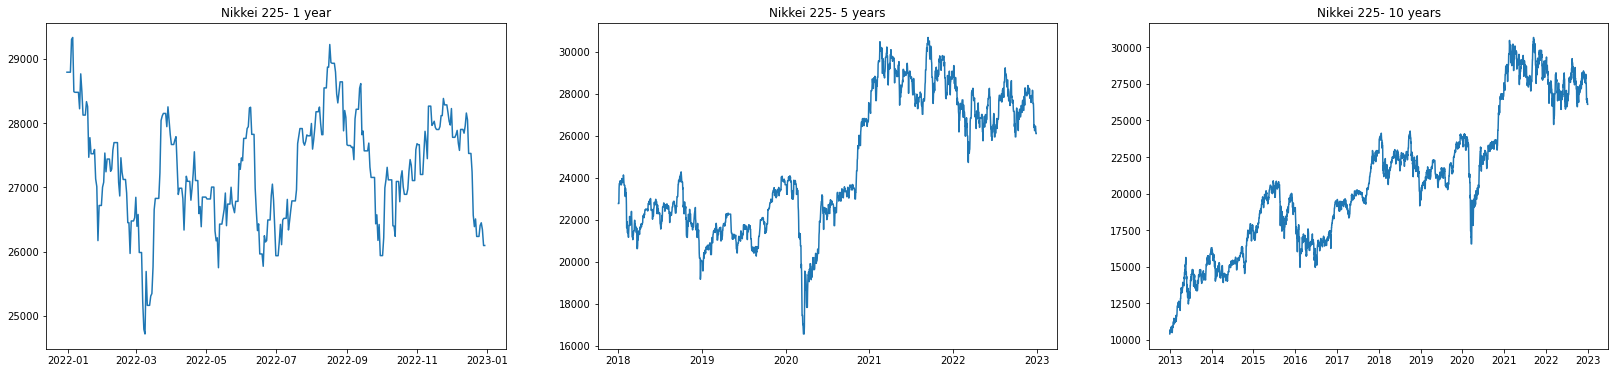

18 Daily Charts of Russell 2000


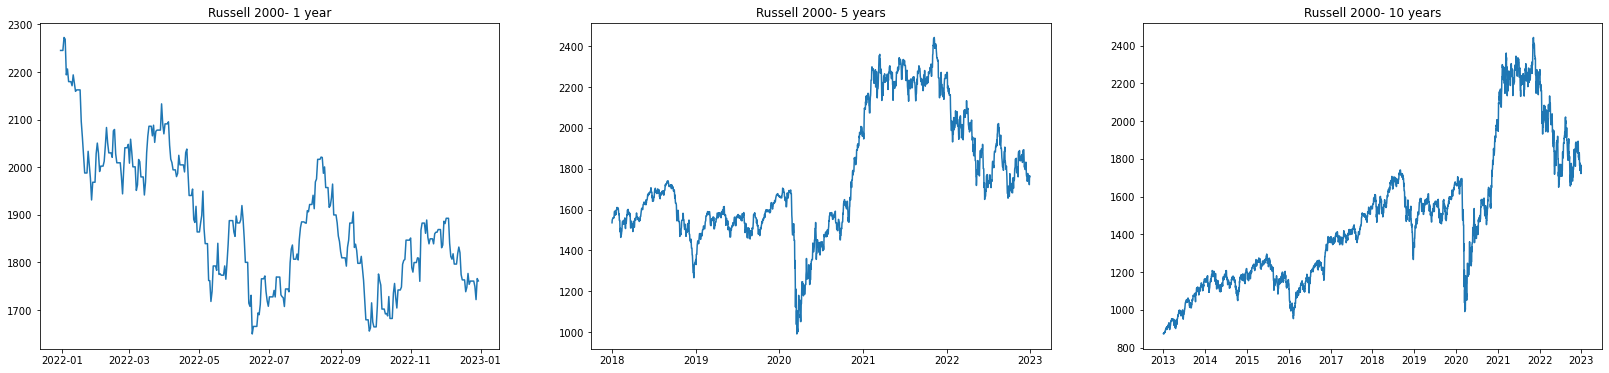

19 Daily Charts of STI Index


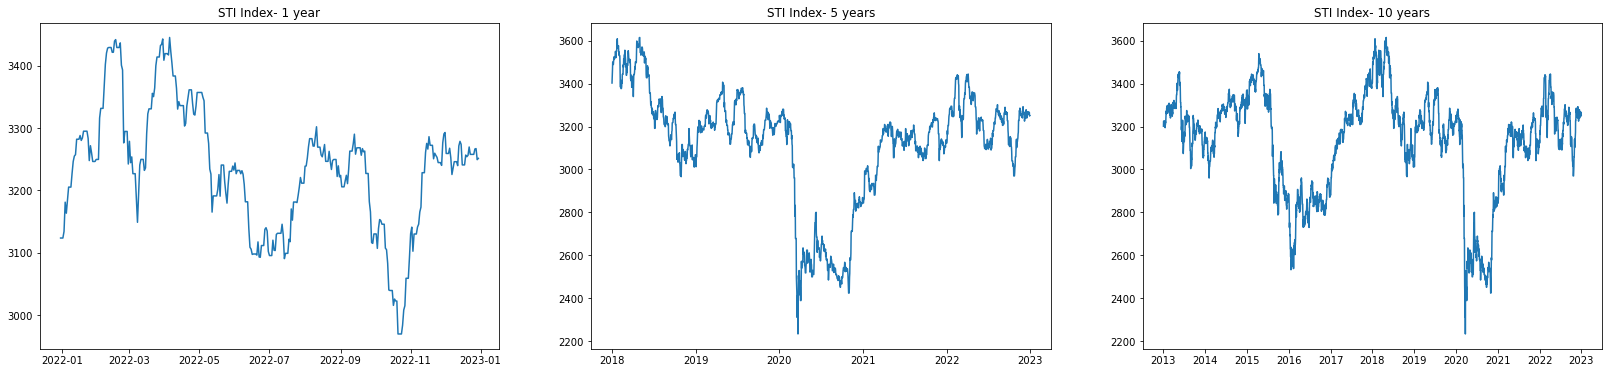

20 Daily Charts of TSEC weighted index


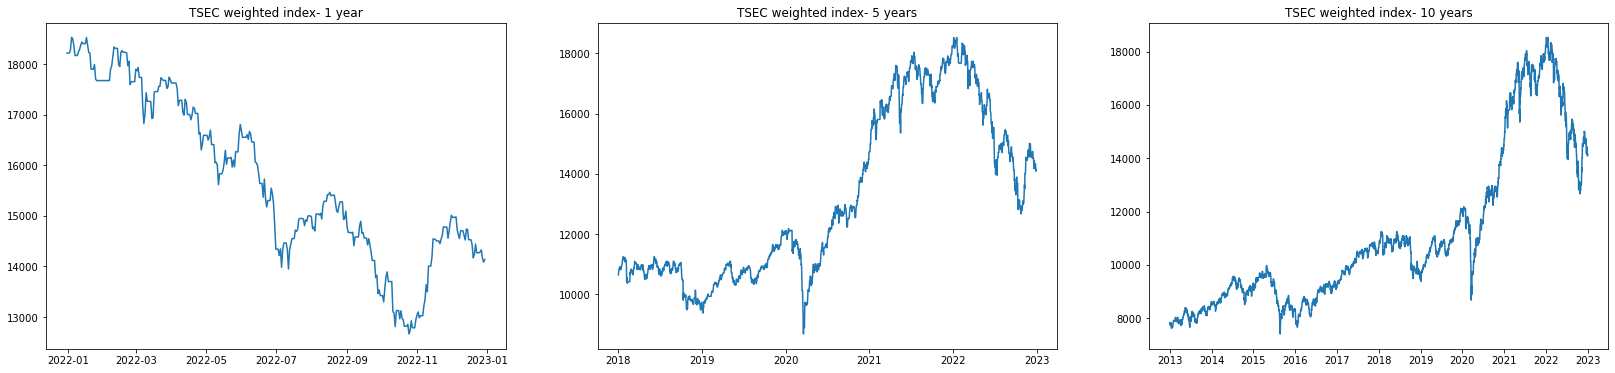

In [7]:
ct=0
for n in df_name1 :
    ct=ct+1
    print(ct,"Daily Charts of", n)
    plt.figure(figsize=(28,6))
    plt.subplot(1,3,1)
    plt.title(n + '- 1 year')
    plt.plot(df1_all[n].iloc[-365:])    
    #plt.show() 

    #print(ct,"5 Year Daily Chart of ", n)
    #plt.figure(figsize=(20,6))
    plt.subplot(1,3,2)
    plt.title(n + '- 5 years')
    plt.plot(df1_all[n].iloc[-365*5:]) 

    plt.subplot(1,3,3)
    plt.title(n + '- 10 years')
    plt.plot(df1_all[n].iloc[-365*10:]) 

    plt.show() 